In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

<Figure size 3000x800 with 0 Axes>

In [5]:
df = pd.read_csv('Loan Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Verifying

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.shape

(614, 13)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum() / df.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Gender Column fix

In [11]:
df['Gender'].isnull().sum()

13

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df['Gender'].isnull().sum()

0

# Married column fix 

In [14]:
df['Married'].isnull().sum()

3

In [15]:
df[df['Married'].isnull() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [16]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [17]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [18]:
df['Married'].isnull().sum()

0

# Dependents column fix

In [19]:
df['Dependents'].isnull().sum()

15

In [20]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [21]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [22]:
df['Dependents'].isnull().sum()

0

# Self_Employed column fix

In [23]:
df['Self_Employed'].isnull().sum()

32

In [24]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [25]:
gen = df.groupby('Gender')['Self_Employed']
gen.value_counts()

Gender  Self_Employed
Female  No                89
        Yes               15
Male    No               411
        Yes               67
Name: count, dtype: int64

In [26]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [27]:
df['Self_Employed'].isnull().sum()

0

# LoanAmount column fix

In [28]:
df['LoanAmount'].isnull().sum()

22

In [29]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [30]:
gen = df.groupby('Gender')['LoanAmount']
gen.mean()

Gender
Female    126.697248
Male      150.861284
Name: LoanAmount, dtype: float64

In [31]:
gen = df.groupby('Education')['LoanAmount']
gen.mean()

Education
Graduate        154.060215
Not Graduate    118.409449
Name: LoanAmount, dtype: float64

In [32]:
gen = df.groupby('Dependents')['LoanAmount']
gen.mean()

Dependents
0     135.605187
1     158.622449
2     150.224490
3+    190.897959
Name: LoanAmount, dtype: float64

In [33]:
gen = df.groupby('Married')['LoanAmount']
gen.mean()

Married
No     128.883495
Yes    155.766839
Name: LoanAmount, dtype: float64

In [34]:
gen = df.groupby('Property_Area')['LoanAmount']
gen.mean()

Property_Area
Rural        152.260116
Semiurban    145.504386
Urban        142.198953
Name: LoanAmount, dtype: float64

In [35]:
df['LoanAmount'].mean()

146.41216216216216

In [36]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [37]:
df['LoanAmount'].isnull().sum()

0

# Loan_Amount_Term column fix

In [38]:
df['Loan_Amount_Term'].isnull().sum()

14

In [39]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

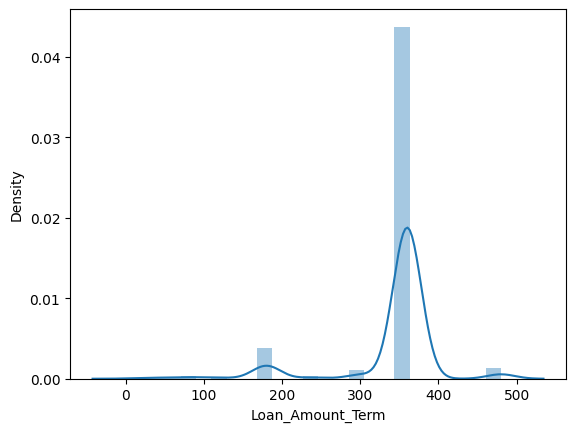

In [40]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df['Loan_Amount_Term'])
plt.show()

In [41]:
med_df = df
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [42]:
df['Loan_Amount_Term'].isnull().sum()

0

# Credit_History column fix

In [43]:
df['Credit_History'].isnull().sum()

50

In [44]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [45]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [46]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [47]:
df['Credit_History'].isnull().sum()

0

In [48]:
df.isnull().sum().sum()

0

# Data Outliers remove

In [49]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

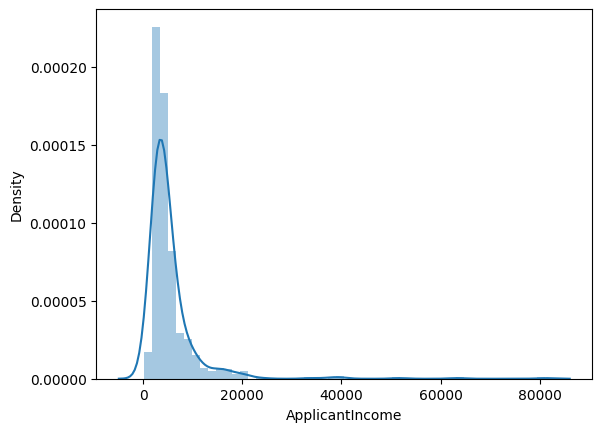

In [51]:
sns.distplot(df['ApplicantIncome'])
plt.show()

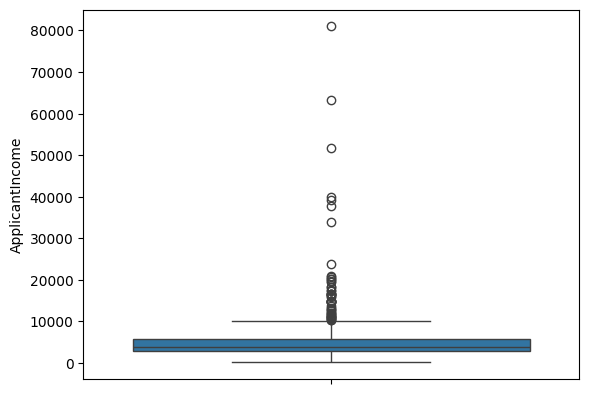

In [52]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

In [53]:
lw = df['ApplicantIncome'].mean() - 1.5*df['ApplicantIncome'].std()
up = df['ApplicantIncome'].mean() + 1.5*df['ApplicantIncome'].std()
print('Lower : ',lw)
print('Upper : ',up)

dfo = df[(df['ApplicantIncome'] <= up) & (df['ApplicantIncome'] >= lw)]
dfo['ApplicantIncome'].describe()

Lower :  -3760.1032266931443
Upper :  14567.02179346839


count      582.000000
mean      4358.183849
std       2310.550227
min        150.000000
25%       2773.000000
50%       3705.500000
75%       5328.750000
max      13650.000000
Name: ApplicantIncome, dtype: float64

<Axes: ylabel='ApplicantIncome'>

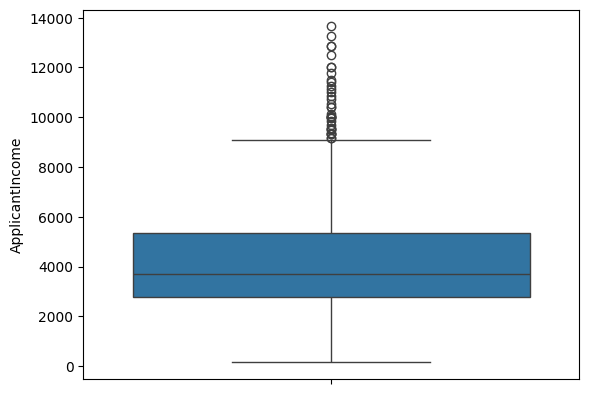

In [54]:
sns.boxplot(dfo['ApplicantIncome'])

In [55]:
dfo.shape

(582, 13)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

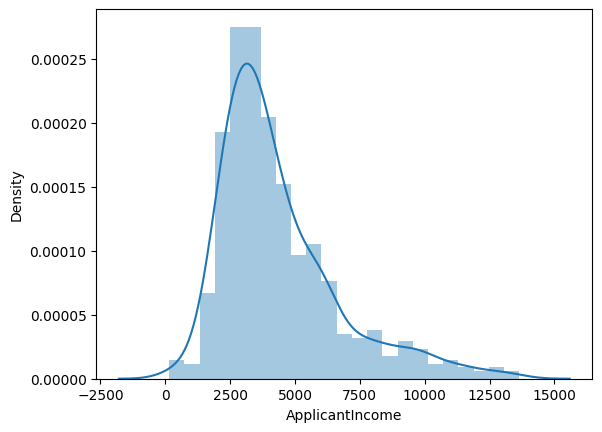

In [56]:
sns.distplot(dfo['ApplicantIncome'])

In [57]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='LoanAmount', ylabel='Density'>

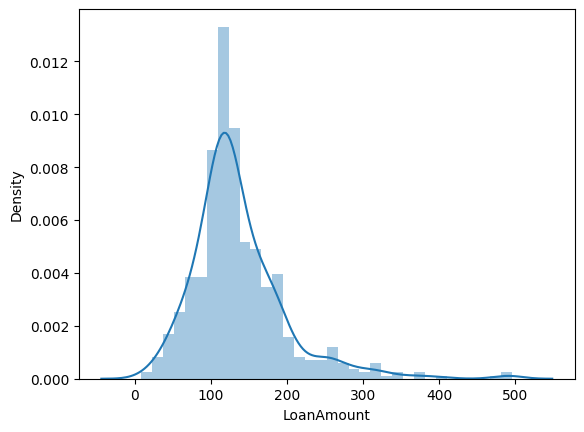

In [58]:
sns.distplot(dfo['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

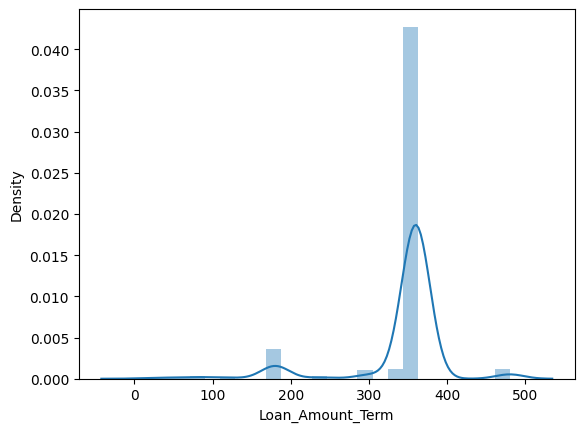

In [59]:
sns.distplot(dfo['Loan_Amount_Term'])

<Axes: ylabel='CoapplicantIncome'>

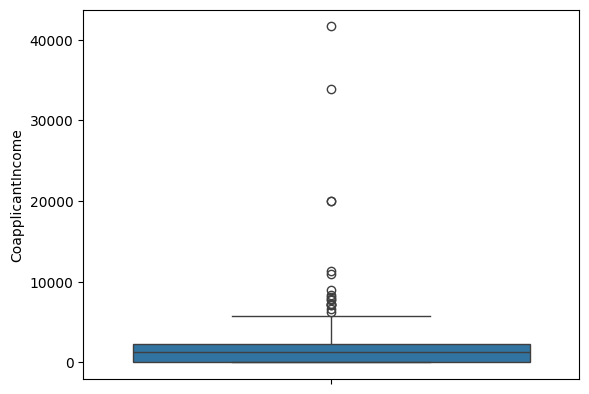

In [60]:
sns.boxplot(dfo['CoapplicantIncome'])

In [61]:
dfo = dfo[dfo['CoapplicantIncome'] <= 7500]

In [62]:
dfo.shape

(571, 13)

<Axes: ylabel='CoapplicantIncome'>

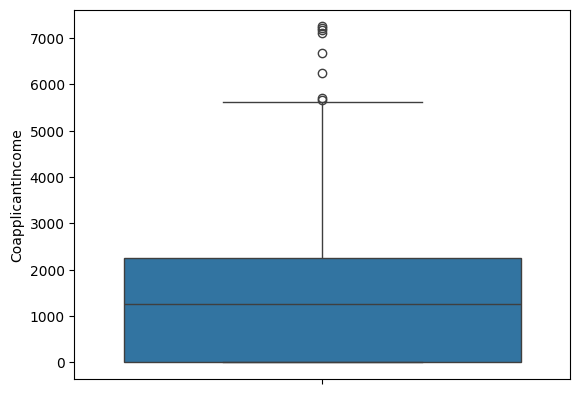

In [63]:
sns.boxplot(dfo['CoapplicantIncome'])


In [64]:
dfo['CoapplicantIncome'].shape

(571,)

# Data Analysis

# From where maximum loan application comes

In [65]:
dfo.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='Property_Area', ylabel='count'>

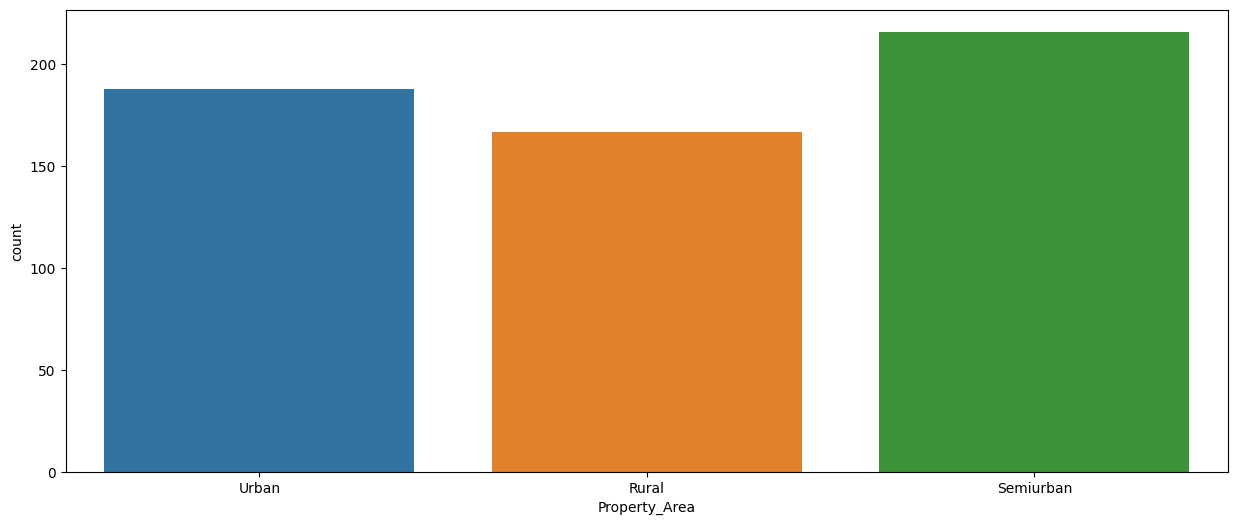

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(x=dfo['Property_Area'],hue=dfo['Property_Area'])

In [67]:
dfo['Property_Area'].value_counts()

Property_Area
Semiurban    216
Urban        188
Rural        167
Name: count, dtype: int64

In [68]:
dfo['Property_Area'].value_counts()/dfo['Property_Area'].value_counts().sum()*100

Property_Area
Semiurban    37.828371
Urban        32.924694
Rural        29.246935
Name: count, dtype: float64

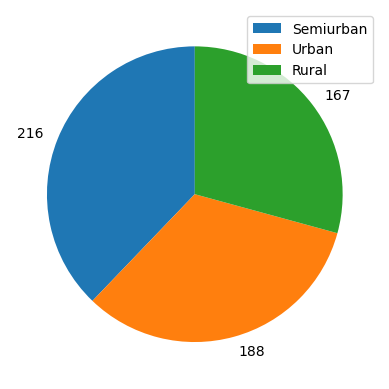

In [69]:
plt.pie(dfo['Property_Area'].value_counts(),labels=dfo['Property_Area'].value_counts(),startangle=90)
plt.legend(dfo['Property_Area'].value_counts().index)
plt.show()

In [70]:
df['Property_Area'].value_counts()/df['Property_Area'].value_counts().sum()*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: count, dtype: float64

In [71]:
print(dfo.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# What is Common Loan Amount was taken by costumer

In [72]:
dfo['LoanAmount'].mean()

134.05429071803852

In [73]:
dfo['LoanAmount'].median()

123.0

<Axes: xlabel='Loan_ID', ylabel='LoanAmount'>

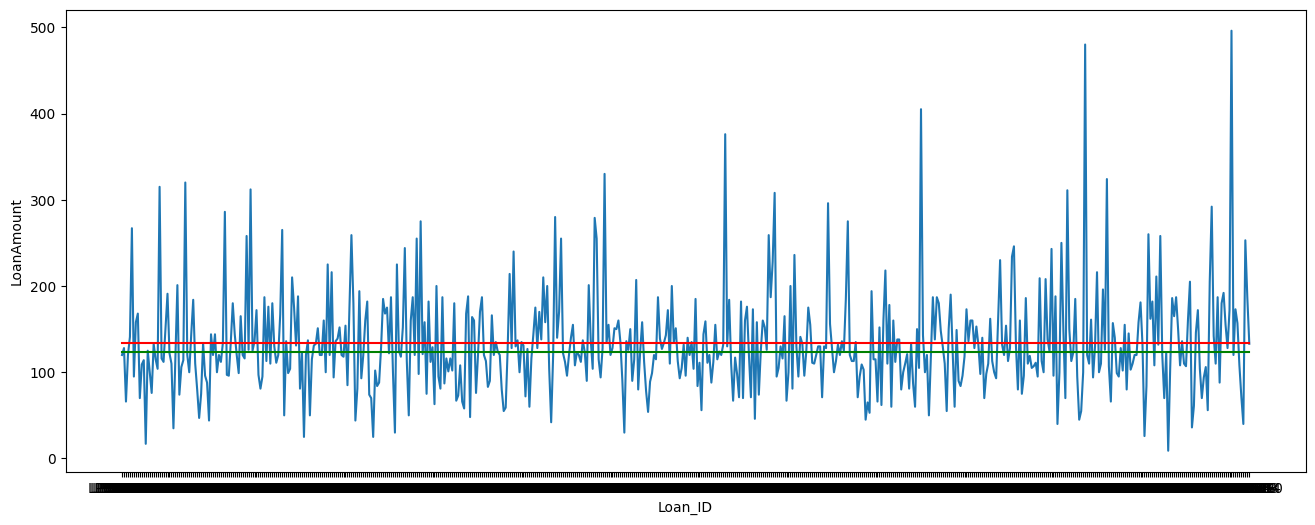

In [74]:
plt.figure(figsize=(16,6))
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'])
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'].mean(),color='red')
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'].median(),color='green')

<Axes: xlabel='Loan_ID', ylabel='LoanAmount'>

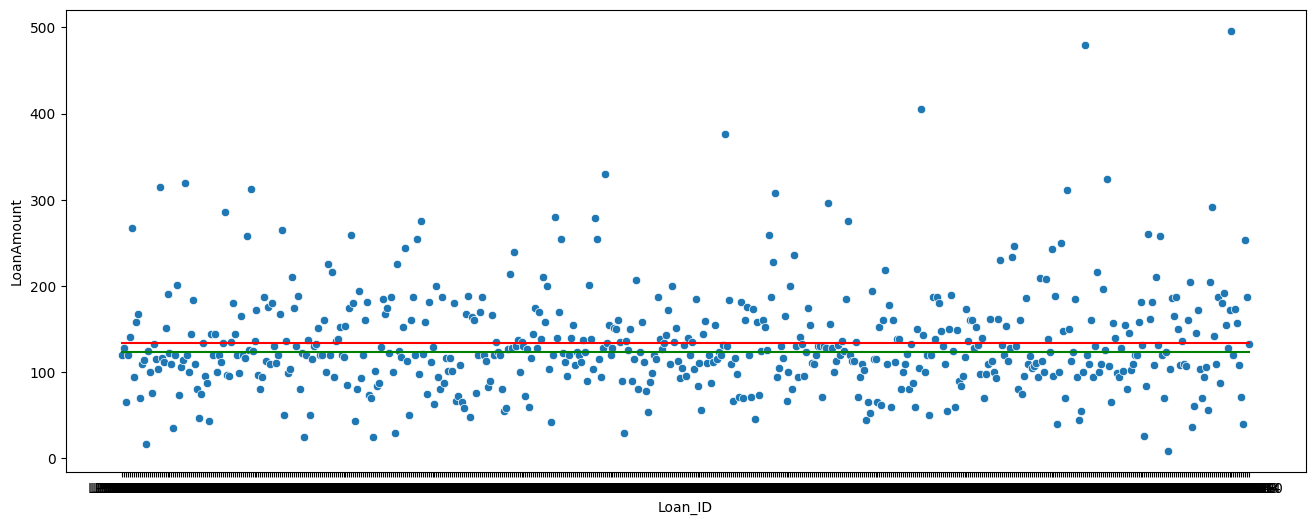

In [75]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'])
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'].mean(),color='red')
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'].median(),color='green')

In [76]:
up = dfo['LoanAmount'].quantile(0.75) + dfo['LoanAmount'].mean()
up
# dfo['LoanAmount'].quantile(0.75)

292.5542907180385

In [77]:
lw = dfo['LoanAmount'].quantile(0.25) - dfo['LoanAmount'].mean()
lw
# dfo['LoanAmount'].quantile(0.75)

-34.054290718038516

<Axes: xlabel='Loan_ID', ylabel='LoanAmount'>

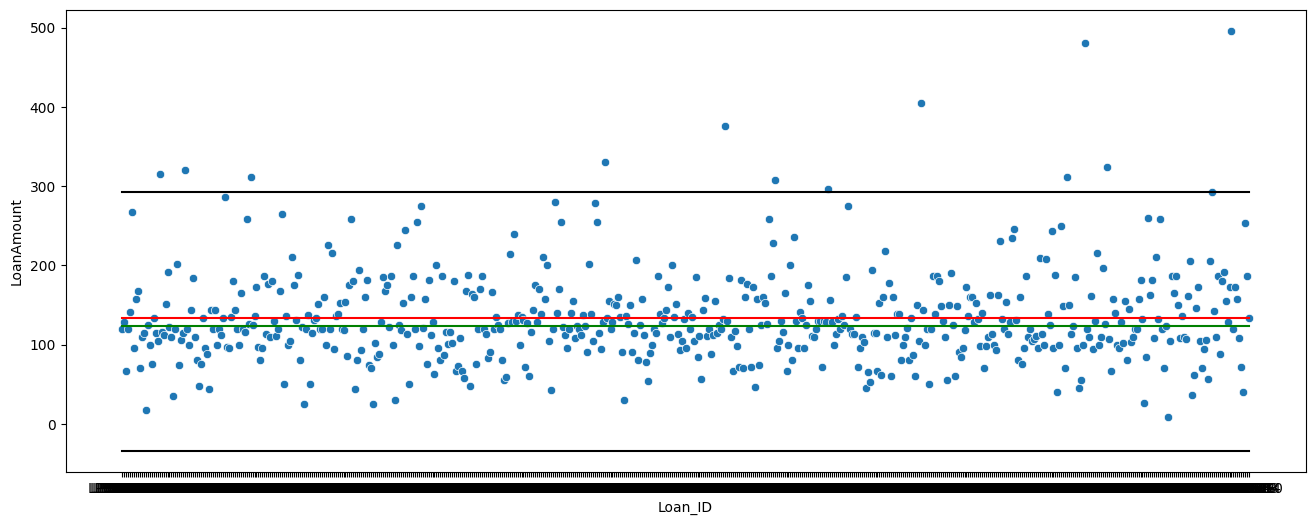

In [78]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'])
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'].mean(),color='red')
sns.lineplot(x=dfo['Loan_ID'],y=dfo['LoanAmount'].median(),color='green')
sns.lineplot(x=dfo['Loan_ID'],y=up,color='black')
sns.lineplot(x=dfo['Loan_ID'],y=lw,color='black')

In [79]:
dfo.shape

(571, 13)

In [80]:
dfo.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
257,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,N
381,LP002229,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban,Y


In [81]:
dfo.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Logical Regression

In [82]:
X=dfo[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y=dfo['Loan_Status']

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
sc = StandardScaler()
X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = sc.fit_transform(X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [86]:
one = OneHotEncoder()
one.fit(X_train[['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area']])

OneHotEncoder()

In [87]:
col_tr = make_column_transformer((OneHotEncoder(categories=one.categories_),['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']),remainder='passthrough')
col_tr

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Female', 'Male'], dtype=object),
                                                           array(['No', 'Yes'], dtype=object),
                                                           array(['0', '1', '2', '3+'], dtype=object),
                                                           array(['Graduate', 'Not Graduate'], dtype=object),
                                                           array(['No', 'Yes'], dtype=object),
                                                           array(['Rural', 'Semiurban', 'Urban'], dtype=object)]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area'])])

In [88]:
classifer = LogisticRegression()

In [89]:
pipe = make_pipeline(col_tr,classifer)

In [90]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Female', 'Male'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['0', '1', '2', '3+'], dtype=object),
                                                                            array(['Graduate', 'Not Graduate'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['Rural', 'Semiurban', 'Urban'], dtype=object)]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('logisticregression', LogisticRegression())])

In [91]:
y_pred = pipe.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y'],
      dtype=object)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.808695652173913

In [94]:
import pickle as pk

In [95]:
pk.dump(pipe,open('model.pkl','wb'))
pk.dump(sc,open('scaler.pkl','wb'))

# Decision tree

In [113]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [114]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [116]:
df.drop(columns=['Loan_ID'],inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [ ]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=33)

In [117]:
one = OneHotEncoder()
one.fit(X[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])

OneHotEncoder()

In [118]:
col_tr = make_column_transformer((OneHotEncoder(categories=one.categories_),['Gender','Married','Dependents','Education','Self_Employed','Property_Area']),remainder="passthrough")

In [119]:
target = tree.DecisionTreeClassifier()
target.fit(col_tr,y)

TypeError: float() argument must be a string or a real number, not 'ColumnTransformer'